In [10]:
import sqlite3
db = sqlite3.connect('./database')
cursor = db.cursor()
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def get_data(WGD_name, SSD_name, sing_name, db_var, log):
    db = sqlite3.connect('./database')
    cursor = db.cursor()
    WGD_name = []
    SSD_name = []
    sing_name = []
    cursor.execute('''SELECT DISTINCT id, ? FROM gene_features WHERE (dup_type == "WGD")''',(db_var,))
    if log == True:
        for x in cursor.fetchall():
            try:
                WGD_name.append(math.log10(float(x[0])))
            except ValueError:
                next  
    else:
        [WGD_name.append(x[0]) for x in cursor.fetchall()]
    query = '''SELECT DISTINCT id %s FROM gene_features WHERE (dup_type == "SSD")'''%(str(db_var,))
    cursor.execute(query)
    if log == True:
        for x in cursor.fetchall():
            try:
                SSD_name.append(math.log10(float(x[1])))
            except ValueError:
                next  
    else:
        [SSD_name.append(x[0]) for x in cursor.fetchall()]
    cursor.execute('''SELECT DISTINCT id, ? FROM gene_features WHERE (dup_type == "singleton")''',(db_var,))
    if log == True:
        for x in cursor.fetchall():
            try:
                sing_name.append(math.log10(float(x[0])))
            except ValueError:
                next  
    else:
        [sing_name.append(x[0]) for x in cursor.fetchall()]
    return(WGD_name,SSD_name,sing_name)

In [12]:
def multi_plot(WGD_name,SSD_name,sing_name,maxi,bin_min,bin_max,step):
    
    fig = plt.figure()

    bins = np.arange(bin_min,bin_max,step)

    #get 5% intervals for y axis
    WGD_5 = 0.05*len(WGD_name)
    SSD_5 = 0.05*len(SSD_name)
    sing_5 = 0.05*len(sing_name)

    sub1 = plt.subplot2grid((12,12), (0,0), rowspan = 12, colspan = 4)
    sub1.set_title(label = 'WGD')
    sub1.set_ylim(ymax = maxi*(len(WGD_name)))
    sub1.yaxis.set_major_formatter(ticker.PercentFormatter(len(WGD_name)))
    plt.yticks(np.arange(0, maxi*(len(WGD_name)), WGD_5))
    plt.hist(WGD_name, orientation = 'vertical', color='#4EC4E2', bins=bins)

    sub2 = plt.subplot2grid((12,12), (0,4), rowspan = 12, colspan = 4, sharex = sub1)
    sub2.set_title(label = 'SSD')
    sub2.set_ylim(ymax = maxi*(len(SSD_name)))
    sub2.yaxis.set_major_formatter(ticker.PercentFormatter(len(SSD_name)))
    #sub2.axes.get_yaxis().set_visible(False)
    plt.yticks(np.arange(0, maxi*(len(SSD_name)), SSD_5))
    plt.hist(SSD_name, orientation = 'vertical', color='#4EE284', bins=bins)

    sub3 = plt.subplot2grid((12,12), (0,8), rowspan = 12, colspan = 4, sharex = sub1)
    sub3.set_title(label = 'Singleton')
    sub3.set_ylim(ymax = maxi*(len(sing_name)))
    sub3.yaxis.set_major_formatter(ticker.PercentFormatter(len(sing_name)))
    #sub3.axes.get_yaxis().set_visible(False)
    plt.yticks(np.arange(0, maxi*(len(sing_name)), sing_5))
    plt.hist(sing_name, orientation = 'vertical', color='#D72525', bins=bins)


    plt.tight_layout
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

In [13]:
def overlapping_hist(WGD_name,SSD_name,maxi, bin_min, bin_max, step, file_name, title, xlabel):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.ticker as ticker
    
    fig,ax = plt.subplots()
    
    bins = np.arange(bin_min,bin_max,step)
    
    WGD_5 = 0.05*len(WGD_name)
    SSD_5 = 0.05*len(SSD_name)

    ax.yaxis.set_major_formatter(ticker.PercentFormatter(len(WGD_name)))
    ax.set_ylim(ymax = maxi*len(WGD_name))
    ax.set_yticks(np.arange(0,maxi*len(WGD_name),WGD_5))
    ax.hist(WGD_name, bins= bins, fc =(0,1,0,0.3), label='WGD')
    ax_h, ax_l = ax.get_legend_handles_labels()
    ax.set_xlabel(xlabel)

    ax2 = ax.twinx()
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(len(SSD_name)))
    ax2.get_yaxis().set_visible(False)
    ax2.set_ylim(ymax = maxi*len(SSD_name))
    ax2.set_yticks(np.arange(0, maxi*(len(SSD_name)), SSD_5))
    ax2.hist(SSD_name, fc= (0,0,1,0.3), bins = bins, label='SSD')
    ax2_h, ax2_l = ax2.get_legend_handles_labels()

    handles= ax_h + ax2_h
    labels = ax_l + ax2_l

    plt.title(title)
    plt.legend(handles, labels)
    plt.grid(axis='y')
    plt.savefig(file_name + '.png')
    plt.show()

In [14]:
def three_hist(WGD_name, SSD_name, sing_name, bin_min, bin_max, step, file_name, title, xlabel):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.ticker as ticker
    
    fig,ax = plt.subplots()
    
    bins = np.arange(bin_min,bin_max,step)

    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax.set_yticks(np.arange(0,1,0.05))
    
    r,e = np.histogram(WGD_name, bins= bins,density=True)
    binWidth = e[1] - e[0]
    plt.bar(e[:-1], r*binWidth, binWidth, fc = (0,1,0,0.3), label = 'WGD', align='edge')
    
    r,e = np.histogram(SSD_name,  bins = bins, density=True)
    binWidth = e[1] - e[0]
    plt.bar(e[:-1], r*binWidth, binWidth, fc= (0,0,1,0.3), label = 'SSD', align='edge')
    
    r,e = np.histogram(sing_name, bins=bins, density=True)
    binWidth = e[1] - e[0]
    plt.bar(e[:-1], r*binWidth, binWidth, fc=(0.5,0,1,0.3), label='Singleton',align='edge')
    
    ax_h, ax_l = ax.get_legend_handles_labels()
    
    ax.set_xlabel(xlabel)

    handles= ax_h
    labels = ax_l

    plt.title(title)
    plt.legend(handles, labels)
    plt.savefig(file_name + '.png')
    plt.show()

In [15]:
def get_stars(list1,list2, n):
    from scipy import stats
    pval = (stats.mannwhitneyu(list1, list2,alternative='two-sided').pvalue)*n
    if pval >= 0.05:
        return('ns')
    elif 0.01 <= pval < 0.05:
        return('*')
    elif 0.001 <= pval < 0.01:
        return('**')
    elif 0.0001 <= pval < 0.001:
        return('***')
    elif pval < 0.0001:
        return('****')

In [16]:
def get_pval(list1, list2, n):
    from scipy import stats
    pval = (stats.mannwhitneyu(list1, list2,alternative='two-sided').pvalue)*n
    if pval < 0.05:
        return('{:.2e}'.format(pval))
    else:
        return(round(pval,2))


In [17]:
def mann_whitney_effect_size(list1, list2):
    import math
    from scipy import stats
    n1 = len(list1)
    n2 = len(list2)
    N = sum([n1,n2])
    U = stats.mannwhitneyu(list1, list2, alternative = 'two-sided').statistic
    mean = U-((n1*n2)/2)
    sd = math.sqrt((n1*n2*(n1+n2+1))/12)
    z = mean/sd
    r = z/math.sqrt(N)
    return(r)

In [21]:
def box_plot_pvals(wList, sList, siList, title, label, correction, filename, large_scale = False, stars=False, tick_lims = None):
    box_list = []
    box_list.append(wList)
    box_list.append(sList)
    box_list.append(siList)
    
    m = max([max(wList), max(sList), max(siList)])
    mi = min([min(wList), min(sList), min(siList)])

    if stars == True and large_scale == False:
        fig, ax = plt.subplots(figsize=(10,10))
        flierprops = dict(markersize=1)
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        
        ann_start = m + 0.25
        ax.set_ylim(ymax=ann_start + 1.7)
        ax.set_yticks(np.arange(round((mi-0.5)*2)/2,ann_start+1.7,0.5))
        if tick_lims == 'percentage':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick <= 100 ]
            ax.set_yticks(ticks)
        elif tick_lims == 'positive':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick]
            ax.set_yticks(ticks)
        
        plt.plot([1,1,2,2], [ann_start,ann_start+0.2,ann_start+0.2,ann_start], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_stars(wList,sList, correction), xy = (1.5, ann_start+0.2), size = 15, ha= 'center')

        plt.plot([2,2,3,3], [ann_start+0.5,ann_start+0.7,ann_start+0.7,ann_start+0.5], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_stars(sList,siList,correction), xy = (2.5, ann_start+0.7), size = 15, ha= 'center') # *s go 0.25 higher

        plt.plot([1,1,3,3], [ann_start+1, ann_start+1.2 ,ann_start+1.2, ann_start+1], color = (0,0,0,1), linewidth = 1)
        ax.annotate(get_stars(wList, siList,correction), xy = (2, ann_start+1.2), size = 15, ha = 'center')
    
    elif stars == True and large_scale == True:
        
        fig, ax = plt.subplots(figsize=(10,10))
        flierprops = dict(markersize=1)
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        
        ann_start = m + 2.5
        ax.set_ylim(ymax=ann_start + 17)
        ax.set_yticks(np.arange(mi-5,ann_start+17,5))
        if tick_lims == 'percentage':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick <= 100 ]
            ax.set_yticks(ticks)
        elif tick_lims == 'positive':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick]
            ax.set_yticks(ticks)
        
        plt.plot([1,1,2,2], [ann_start,ann_start+2,ann_start+2,ann_start], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_stars(wList,sList, correction), xy = (1.5, ann_start+3), size = 10, ha= 'center')


        plt.plot([2,2,3,3], [ann_start+3.5,ann_start+5.5,ann_start+5.5,ann_start+3.5], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_stars(sList,siList,correction), xy = (2.5, ann_start+6.5), size = 10, ha= 'center') # *s go 0.25 higher


        plt.plot([1,1,3,3], [ann_start+6.5, ann_start+8.5 ,ann_start+8.5, ann_start+6.5], color = (0,0,0,1), linewidth = 1)
        ax.annotate(get_stars(wList, siList,correction), xy = (2, ann_start+9), size = 10, ha = 'center')
        
    elif stars == True and large_scale == 'Extra':
        
        fig, ax = plt.subplots(figsize=(10,10))
        flierprops = dict(markersize=1)
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        
        ann_start = m + 25
        ax.set_ylim(ymax=ann_start + 170)
        ax.set_yticks(np.arange(mi-50,ann_start+170,50))
        if tick_lims == 'percentage':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick <= 100 ]
            ax.set_yticks(ticks)
        elif tick_lims == 'positive':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick]
            ax.set_yticks(ticks)
        
        plt.plot([1,1,2,2], [ann_start,ann_start+20,ann_start+20,ann_start], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_stars(wList,sList, correction), xy = (1.5, ann_start+30), size = 10, ha= 'center')


        plt.plot([2,2,3,3], [ann_start+30,ann_start+50,ann_start+50,ann_start+30], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_stars(sList,siList,correction), xy = (2.5, ann_start+60), size = 10, ha= 'center') # *s go 0.25 higher


        plt.plot([1,1,3,3], [ann_start+60, ann_start+80 ,ann_start+80, ann_start+60], color = (0,0,0,1), linewidth = 1)
        ax.annotate(get_stars(wList, siList,correction), xy = (2, ann_start+90), size = 10, ha = 'center')
    
    elif stars == False and large_scale == True:
        
        fig, ax = plt.subplots(figsize=(10,10))
        flierprops = dict(markersize=1)
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        
        ann_start = m + 2.5
        ax.set_ylim(ymax=ann_start + 17)
        ax.set_yticks(np.arange(mi-5,ann_start+17,5))
        if tick_lims == 'percentage':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick <= 100 ]
            ax.set_yticks(ticks)
        elif tick_lims == 'positive':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick]
            ax.set_yticks(ticks)

        plt.plot([1,1,2,2], [ann_start,ann_start+2,ann_start+2,ann_start], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_pval(wList,sList, correction), xy = (1.5, ann_start+3), size = 10, ha= 'center')
        
        plt.plot([2,2,3,3], [ann_start+3.5,ann_start+5.5,ann_start+5.5,ann_start+3.5], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_pval(sList,siList,correction), xy = (2.5, ann_start+6.5), size = 10, ha= 'center')
        
        plt.plot([1,1,3,3], [ann_start+7, ann_start+9 ,ann_start+9, ann_start+7], color = (0,0,0,1), linewidth = 1)
        ax.annotate(get_pval(wList, siList,correction), xy = (2, ann_start+10), size = 10, ha = 'center')
        
    elif stars == False and large_scale == 'Extra':
        
        fig, ax = plt.subplots(figsize=(10,10))
        flierprops = dict(markersize=1)
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        
        ann_start = m + 25
        ax.set_ylim(ymax=ann_start + 170)
        ax.set_yticks(np.arange(mi-50,ann_start+170,50))
        if tick_lims == 'percentage':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick <= 100 ]
            ax.set_yticks(ticks)
        elif tick_lims == 'positive':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick]
            ax.set_yticks(ticks)
        
        plt.plot([1,1,2,2], [ann_start,ann_start+20,ann_start+20,ann_start], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_pval(wList,sList, correction), xy = (1.5, ann_start+30), size = 10, ha= 'center')


        plt.plot([2,2,3,3], [ann_start+35,ann_start+55,ann_start+55,ann_start+35], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_pval(sList,siList,correction), xy = (2.5, ann_start+65), size = 10, ha= 'center') # *s go 0.25 higher


        plt.plot([1,1,3,3], [ann_start+70, ann_start+90 ,ann_start+90, ann_start+70], color = (0,0,0,1), linewidth = 1)
        ax.annotate(get_pval(wList, siList,correction), xy = (2, ann_start+100), size = 10, ha = 'center')
        
    else:
        
        fig, ax = plt.subplots(figsize=(10,10))
        flierprops = dict(markersize=1)
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        
        ann_start = m + 0.25
        ax.set_ylim(ymax=ann_start + 1.7)
        ax.set_yticks(np.arange(round((mi-0.5)*2)/2,ann_start+1.7,0.5))
        if tick_lims == 'percentage':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick <= 100 ]
            ax.set_yticks(ticks)
        elif tick_lims == 'positive':
            ticks = [tick for tick in ax.get_yticks() if 0 <= tick]
            ax.set_yticks(ticks)
        
        plt.plot([1,1,2,2], [ann_start,ann_start+0.2,ann_start+0.2,ann_start], color = (0,0,0,1), linewidth= 1)
        ax.annotate(get_pval(wList,sList, correction), xy = (1.5, ann_start+0.3), size = 10, ha= 'center')
        
        plt.plot([2,2,3,3], [ann_start+0.5,ann_start+0.7,ann_start+0.7,ann_start+0.5], color = (0,0,0,1), linewidth= 1)        
        ax.annotate(get_pval(sList,siList,correction), xy = (2.5, ann_start+0.8), size = 10, ha= 'center')

        plt.plot([1,1,3,3], [ann_start+1, ann_start+1.2 ,ann_start+1.2, ann_start+1], color = (0,0,0,1), linewidth = 1)
        ax.annotate(get_pval(wList, siList,correction), xy = (2, ann_start+1.3), size = 10, ha = 'center')
    
    plt.title(title)

    plt.savefig(filename + '.png')
    
    
    plt.show()
    print('Effect size:', mann_whitney_effect_size(wList, sList))

In [11]:
import math
WGD_dexp, SSD_dexp, sing_dexp = [],[],[]
cursor.execute('''SELECT max_exp FROM gene_features WHERE dup_type == "WGD" AND exp > 1''')
[WGD_dexp.append(math.log10(x[0])) for x in cursor.fetchall()]

cursor.execute('''SELECT max_exp FROM gene_features WHERE dup_type == "SSD" AND exp > 1''')
[SSD_dexp.append(math.log10(x[0])) for x in cursor.fetchall()]

cursor.execute('''SELECT max_exp FROM gene_features WHERE dup_type == "singleton" AND exp > 1''')
[sing_dexp.append(math.log10(x[0])) for x in cursor.fetchall()]
# for x in cursor.fetchall():
#     try:
#         WGD_exp.append(math.log10(x[0]))
#     except TypeError:
#         print(x[0])


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

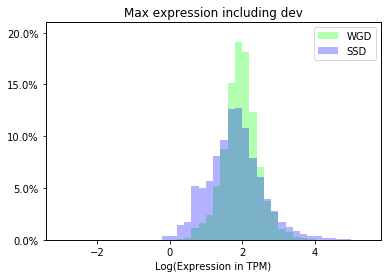

In [12]:
overlapping_hist(WGD_dexp, SSD_dexp, 0.21, -3,5.5,0.2, 'max_exp_new', 'Max expression including dev', 'Log(Expression in TPM)')

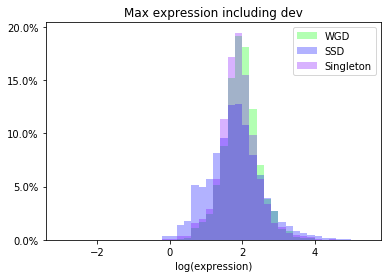

In [14]:
three_hist(WGD_dexp,SSD_dexp,sing_dexp,-3,5.5,0.2, 'max_exp_3', 'Max expression including dev', 'log(expression)')

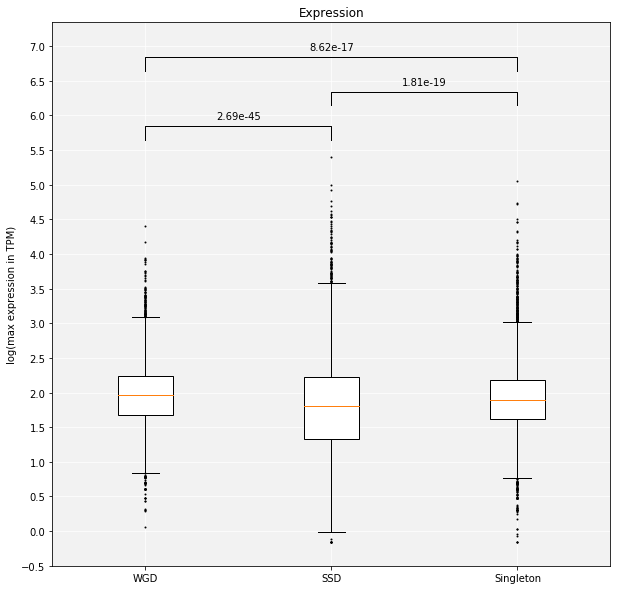

Effect size: 0.14693058097371897


In [15]:
box_plot_pvals(WGD_dexp, SSD_dexp, sing_dexp, 'Expression', 'log(max expression in TPM)',14, 'expression_final')

In [4]:
WGD_len, SSD_len, sing_len = [],[],[]

cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "WGD"''')
[WGD_len.append(math.log10(x[0])) for x in cursor.fetchall()]


cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "SSD"''')
[SSD_len.append(math.log10(x[0])) for x in cursor.fetchall()]


cursor.execute('''SELECT gLength FROM gene_features WHERE dup_type == "singleton"''')
[sing_len.append(math.log10(x[0])) for x in cursor.fetchall()]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

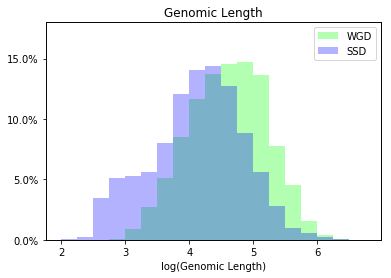

In [399]:
overlapping_hist(WGD_len, SSD_len, 0.18, 2,7,0.25, 'len_new', 'Genomic Length', 'log(Genomic Length)')

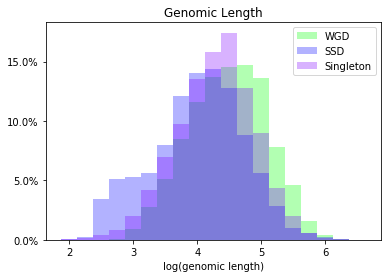

In [449]:
three_hist(WGD_len,SSD_len,sing_len,2,7,0.25,'len_3', 'Genomic Length', 'log(genomic length)')

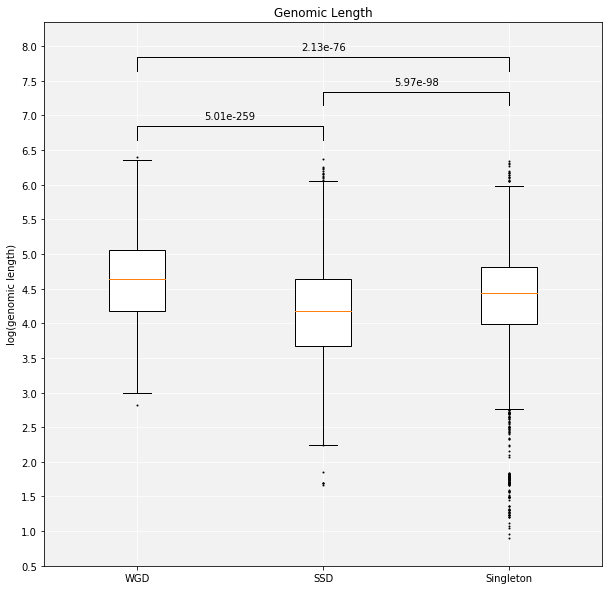

Effect size: 0.327713218482


In [14]:
box_plot_pvals(WGD_len, SSD_len, sing_len, 'Genomic Length', 'log(genomic length)', 14, 'length_final')

In [5]:
import math
WGD_clen, SSD_clen, sing_clen = [],[],[]

cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "WGD"''')
[WGD_clen.append(math.log10(x[0])) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "SSD"''')
[SSD_clen.append(math.log10(x[0])) for x in cursor.fetchall()]


cursor.execute('''SELECT cds_len FROM gene_features WHERE dup_type == "singleton"''')
[sing_clen.append(math.log10(x[0])) for x in cursor.fetchall()]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

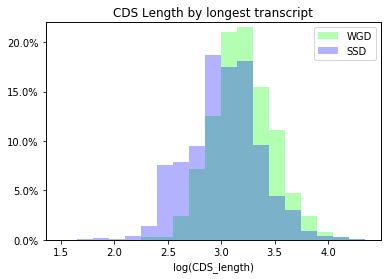

In [42]:
overlapping_hist(WGD_clen, SSD_clen, 0.22, 1.5,4.5,0.15, 'cds_len_new', 'CDS Length by longest transcript', 'log(CDS_length)')

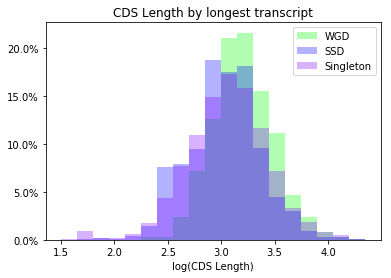

In [43]:
three_hist(WGD_clen,SSD_clen,sing_clen,1.5,4.5,0.15, 'cds_len_3', 'CDS Length by longest transcript', 'log(CDS Length)')

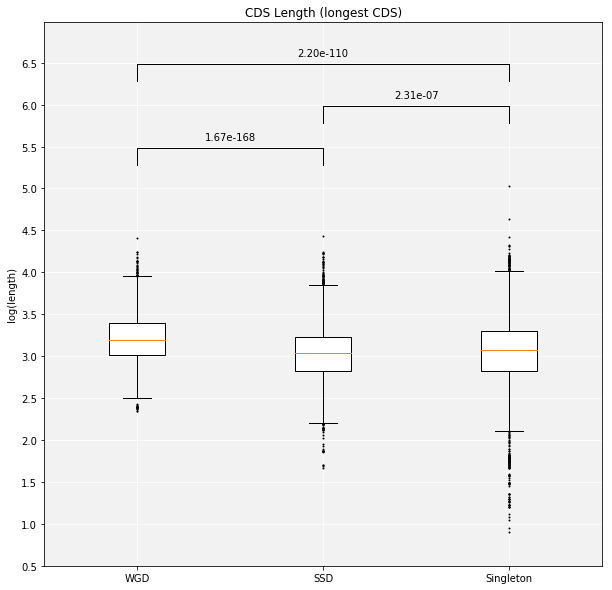

Effect size: 0.26405638355


In [12]:
box_plot_pvals(WGD_clen, SSD_clen, sing_clen, 'CDS Length (longest CDS)', 'log(length)', 14, 'cds_final_len')

In [19]:
cursor.execute('''SELECT gene_features.id, dn_ds FROM gene_features
                INNER JOIN macaque_paralogs ON 
                gene_features.id == macaque_paralogs.id
                WHERE macaque_paralogs.dn_ds 
                AND gene_features.dup_type == "WGD"
                AND macaque_paralogs.dn_ds < 10''')
WGD_mevol = [x[1] for x in cursor.fetchall()]

cursor.execute('''SELECT gene_features.id, dn_ds FROM gene_features
                INNER JOIN macaque_paralogs ON 
                gene_features.id == macaque_paralogs.id
                WHERE macaque_paralogs.dn_ds 
                AND gene_features.dup_type == "SSD"
                AND macaque_paralogs.dn_ds < 10''')
SSD_mevol = [x[1] for x in cursor.fetchall()]

cursor.execute('''SELECT gene_features.id, dn_ds FROM gene_features
                INNER JOIN macaque_paralogs ON 
                gene_features.id == macaque_paralogs.id
                WHERE macaque_paralogs.dn_ds 
                AND gene_features.dup_type == "singleton"
                AND macaque_paralogs.dn_ds < 10''')
sing_mevol = [x[1] for x in cursor.fetchall()]



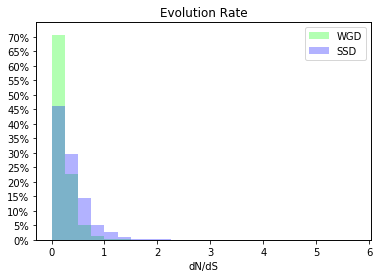

In [80]:
overlapping_hist(WGD_mevol, SSD_mevol, 0.75, 0,6,0.25, 'evol_new', 'Evolution Rate', 'dN/dS')

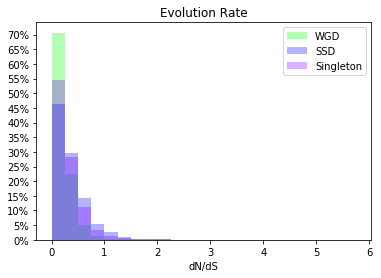

In [85]:
three_hist(WGD_mevol,SSD_mevol,sing_mevol,0,6,0.25, 'evol_3', 'Evolution Rate', 'dN/dS')

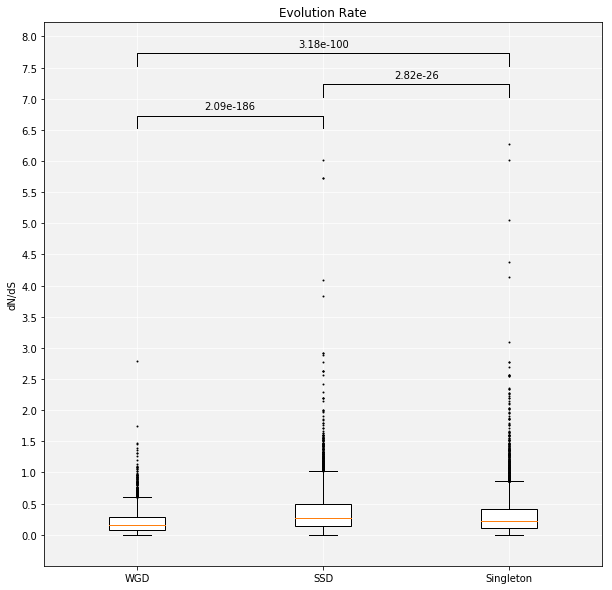

Effect size: -0.28601959610655464


In [22]:
box_plot_pvals(WGD_mevol, SSD_mevol, sing_mevol, 'Evolution Rate', 'dN/dS', 14, 'evolRate_final', tick_lims='positive')

In [7]:
import math
WGD_ess, SSD_ess, sing_ess = [],[],[]

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "WGD"''')
for x in cursor.fetchall():
    WGD_ess.append(-x[0])
#     try:
#         WGD_ess.append(math.log2(-x[0])) 
#     except ValueError:
#         next
cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "SSD"''')
for x in cursor.fetchall():
    SSD_ess.append(-x[0])
#     try:
#         SSD_ess.append(math.log2(-x[0])) 
#     except ValueError:
#         next

cursor.execute('''SELECT ess FROM gene_features WHERE ess AND dup_type == "singleton"''')
[sing_ess.append(-x[0]) for x in cursor.fetchall()]

print(max(WGD_ess))
print(max(sing_ess))

5.726
5.784


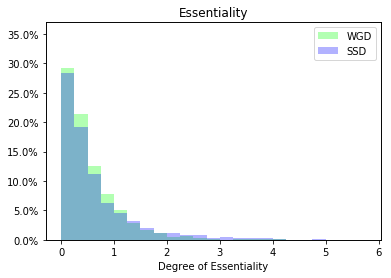

In [17]:
overlapping_hist(WGD_ess, SSD_ess, 0.37, 0,6,0.25, 'ess_new', 'Essentiality', 'Degree of Essentiality')

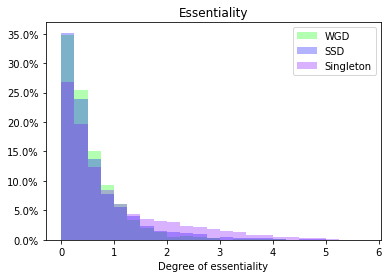

In [23]:
three_hist(WGD_ess,SSD_ess,sing_ess,0,6,0.25,'ess_3','Essentiality', 'Degree of essentiality')

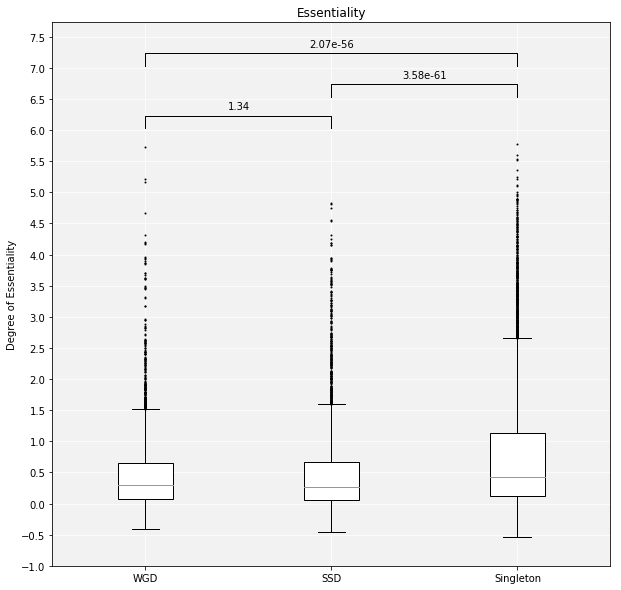

Effect size: 0.0172693545001


In [18]:
box_plot_pvals(WGD_ess, SSD_ess, sing_ess, 'Essentiality','Degree of Essentiality',14, 'ess_final')

In [19]:
cursor.execute('''SELECT unique_domains FROM gene_features WHERE dup_type == "WGD"''')
w_ud = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT unique_domains FROM gene_features WHERE dup_type == "SSD"''')
s_ud = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT unique_domains FROM gene_features WHERE dup_type == "singleton"''')
si_ud = [x[0] for x in cursor.fetchall()]

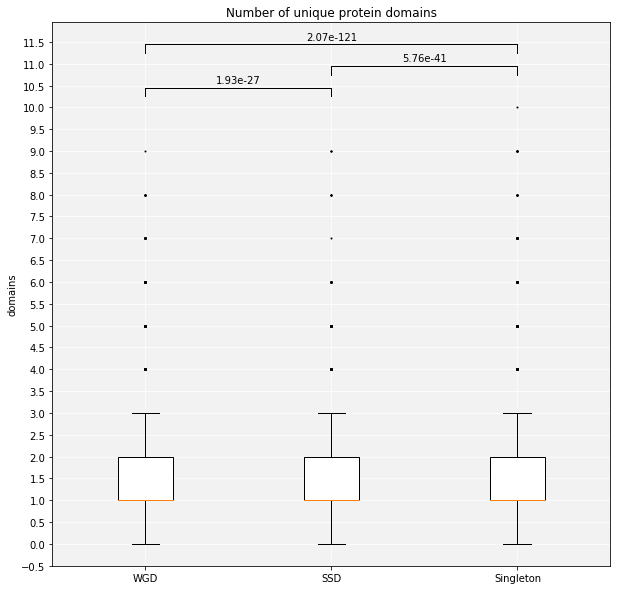

Effect size: 0.0950826197472


In [21]:
box_plot_pvals(w_ud, s_ud, si_ud, 'Number of unique protein domains', 'domains', 14, 'unique_domains', stars=False)

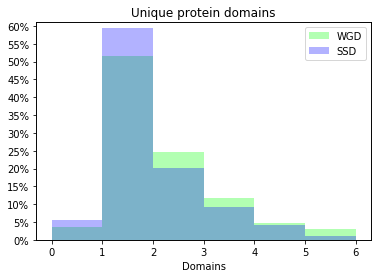

In [177]:
overlapping_hist(w_ud, s_ud, 0.61, 0,7,1, 'unique_domains_hist', 'Unique protein domains', 'Domains')

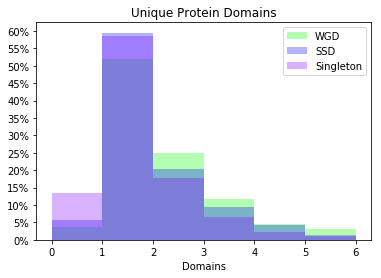

In [176]:
three_hist(w_ud,s_ud,si_ud,0,7,1,'unique_domains_all_hist','Unique Protein Domains', 'Domains')

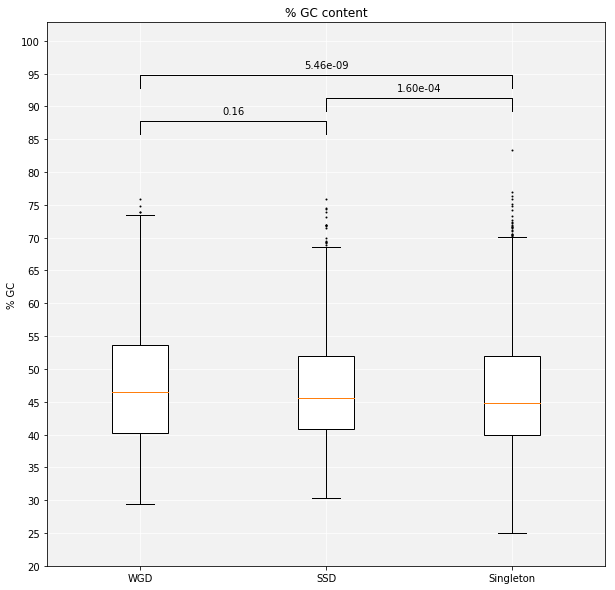

Effect size: 0.0241554220998


In [22]:
cursor.execute('''SELECT gc_content FROM gene_features WHERE dup_type == "WGD"''')
w_gc = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT gc_content FROM gene_features WHERE dup_type == "SSD"''')
s_gc = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT gc_content FROM gene_features WHERE dup_type == "singleton"''')
si_gc = [x[0] for x in cursor.fetchall()]

box_plot_pvals(w_gc, s_gc, si_gc, '% GC content', '% GC', 14, 'gc_content', stars=False, large_scale=True)

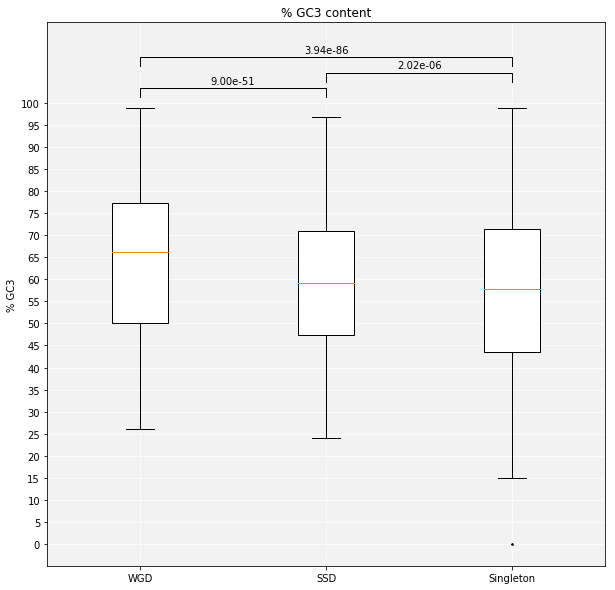

Effect size: 0.14419251516551168


In [24]:
cursor.execute('''SELECT gc3 FROM gene_features WHERE dup_type == "WGD"''')
w_gc3 = [x[0]*100 for x in cursor.fetchall()]
cursor.execute('''SELECT gc3 FROM gene_features WHERE dup_type == "SSD"''')
s_gc3 = [x[0]*100 for x in cursor.fetchall()]
cursor.execute('''SELECT gc3 FROM gene_features WHERE dup_type == "singleton"''')
si_gc3 = [x[0]*100 for x in cursor.fetchall()]

box_plot_pvals(w_gc3, s_gc3, si_gc3, '% GC3 content', '% GC3', 14, 'gc_3', stars=False, large_scale=True, tick_lims='percentage')

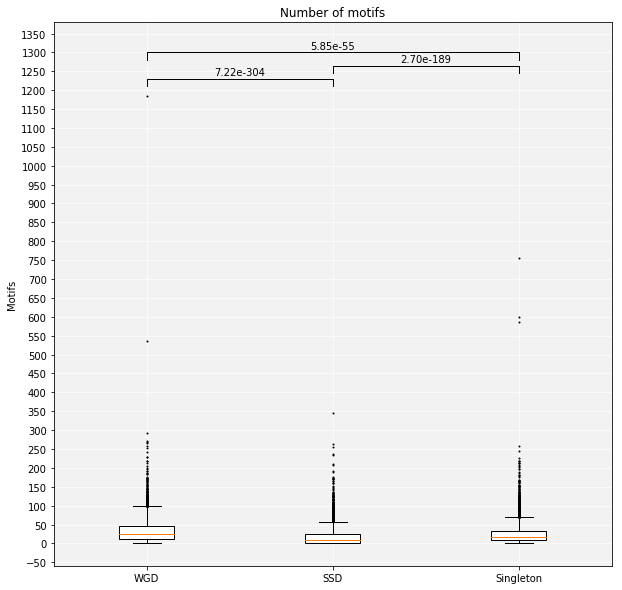

Effect size: 0.3547502361424862


In [27]:
cursor.execute('''SELECT motif_number FROM gene_features WHERE dup_type == "WGD"''')
w_mot = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT motif_number FROM gene_features WHERE dup_type == "SSD"''')
s_mot = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT motif_number FROM gene_features WHERE dup_type == "singleton"''')
si_mot = [x[0] for x in cursor.fetchall()]

box_plot_pvals(w_mot, s_mot, si_mot, 'Number of motifs', 'Motifs', 14, 'motifs', stars=False, large_scale='Extra')

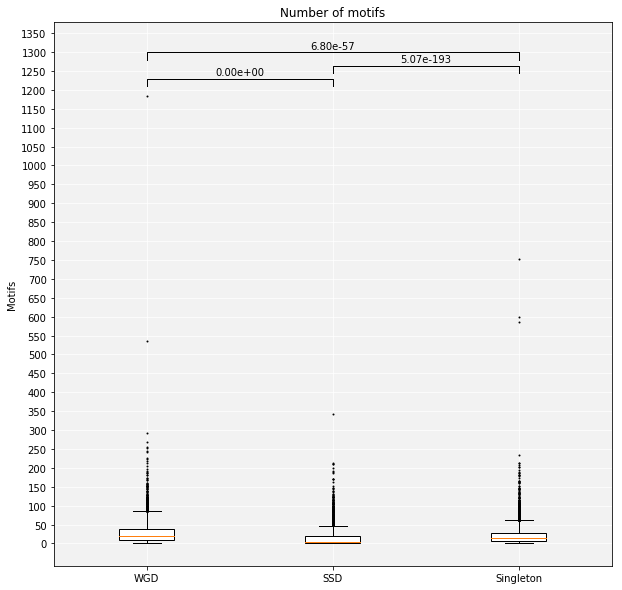

Effect size: 0.35950155796540584


In [23]:
cursor.execute('''SELECT motif_number_1k FROM gene_features WHERE dup_type == "WGD"''')
w_mot = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT motif_number_1k FROM gene_features WHERE dup_type == "SSD"''')
s_mot = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT motif_number_1k FROM gene_features WHERE dup_type == "singleton"''')
si_mot = [x[0] for x in cursor.fetchall()]

box_plot_pvals(w_mot, s_mot, si_mot, 'Number of motifs', 'Motifs', 14, 'motifs_1k', stars=False, large_scale='Extra', tick_lims='positive')

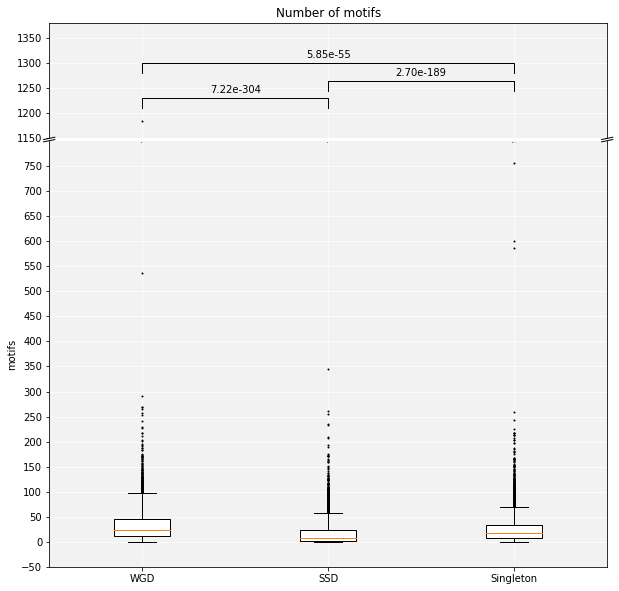

In [28]:
split_box(w_mot, s_mot, si_mot, 'Number of motifs', 'motifs', 14, 'motifs_split', large_scale='Extra', cutoff=800, upper=1150)

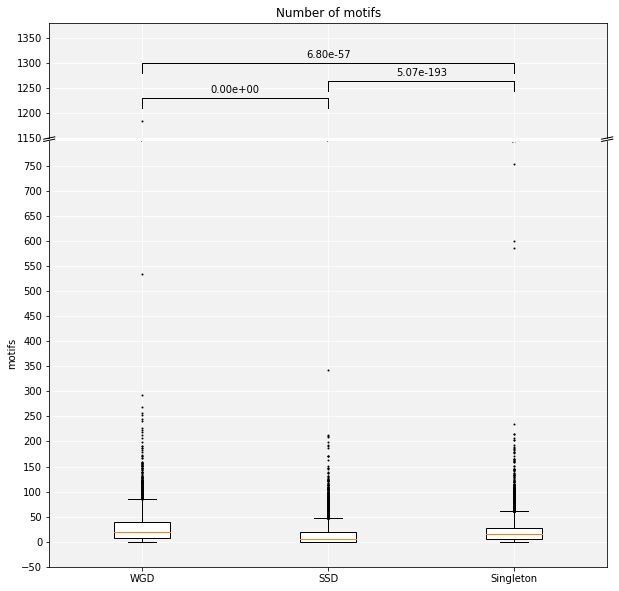

In [26]:
split_box(w_mot, s_mot, si_mot, 'Number of motifs', 'motifs', 14, 'motifs_1k_split', large_scale='Extra', cutoff=800, upper=1150)

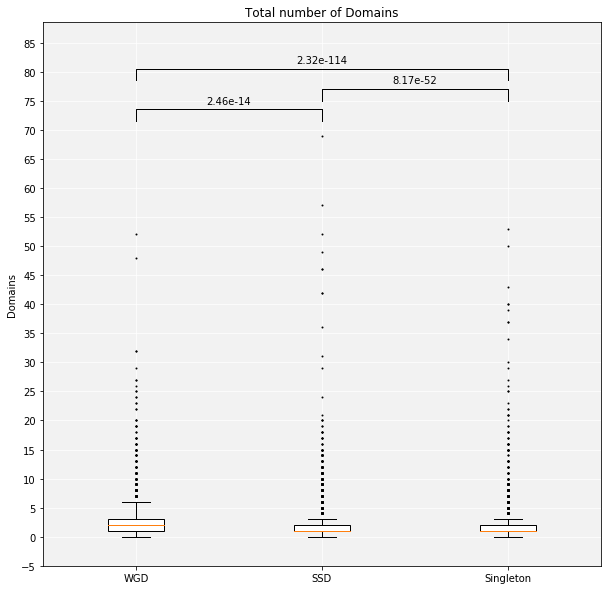

Effect size: 0.070396017079


In [26]:
cursor.execute('''SELECT domains FROM gene_features WHERE dup_type == "WGD" AND domains < 100''')
w_dom = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT domains FROM gene_features WHERE dup_type == "SSD" AND domains < 100''')
s_dom = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT domains FROM gene_features WHERE dup_type == "singleton" AND domains < 100''')
si_dom = [x[0] for x in cursor.fetchall()]

box_plot_pvals(w_dom, s_dom, si_dom, 'Total number of Domains', 'Domains', 14, 'total_domains', stars=False, large_scale=True)

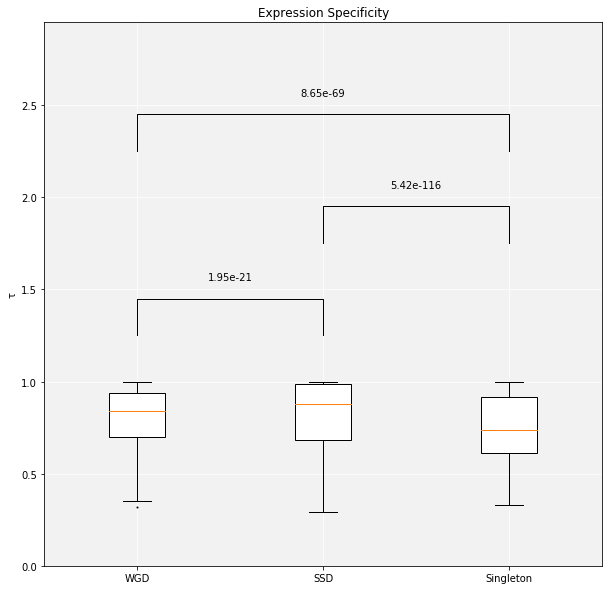

Effect size: -0.1071145542937211


In [26]:
cursor.execute('''SELECT specificity FROM gene_features WHERE specificity AND dup_type == "WGD"''')
w_mot = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT specificity FROM gene_features WHERE specificity AND dup_type == "SSD"''')
s_mot = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT specificity FROM gene_features WHERE specificity AND dup_type == "singleton"''')
si_mot = [x[0] for x in cursor.fetchall()]

box_plot_pvals(w_mot, s_mot, si_mot, 'Expression Specificity', 'τ', 14, 'spec_final', stars=False)

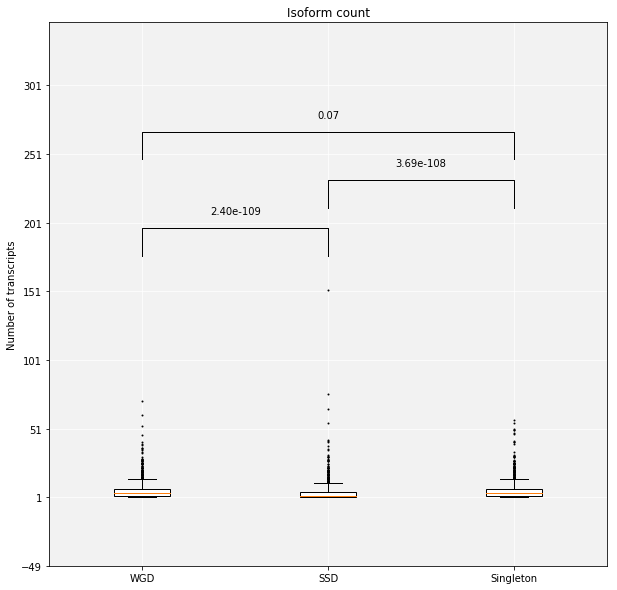

Effect size: 0.20983175649216426


In [13]:
cursor.execute('''SELECT trans_count FROM gene_features WHERE trans_count != -1 AND dup_type == "WGD"''')
w_t = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT trans_count FROM gene_features WHERE trans_count != -1 AND dup_type == "SSD"''')
s_t = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT trans_count FROM gene_features WHERE trans_count != -1 AND dup_type == "singleton"''')
si_t = [x[0] for x in cursor.fetchall()]
box_plot_pvals(w_t, s_t, si_t, 'Isoform count', 'Number of transcripts', 14, 'trans_count__final', stars=False, large_scale='Extra')

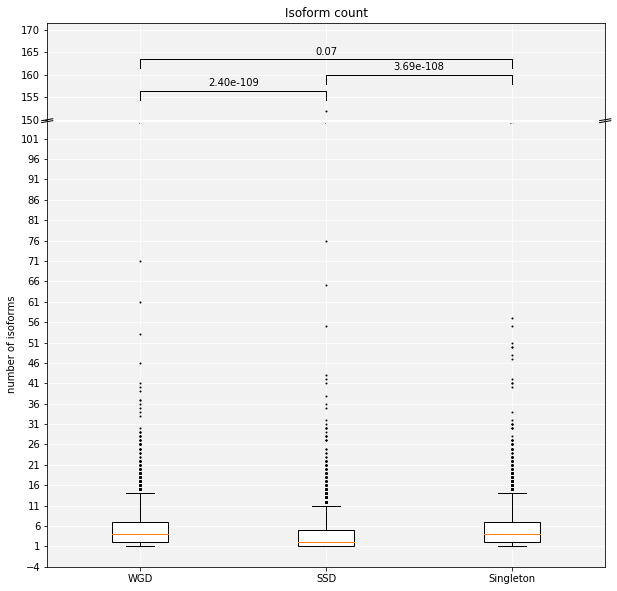

In [30]:
split_box(w_t, s_t, si_t, title='Isoform count', label='number of isoforms', correction=14, filename='split_isoform', large_scale = False,cutoff=100, upper=150)

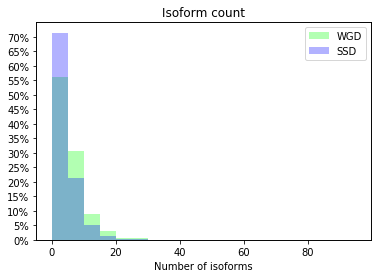

In [107]:
overlapping_hist(w_t, s_t, 0.75, 0,100,5, 'iso_hist', 'Isoform count', 'Number of isoforms')

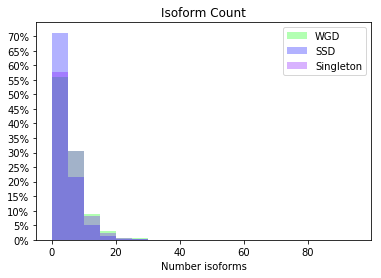

In [108]:
three_hist(w_t,s_t,si_t,0,100,5,'iso_all_hist','Isoform Count', 'Number isoforms')

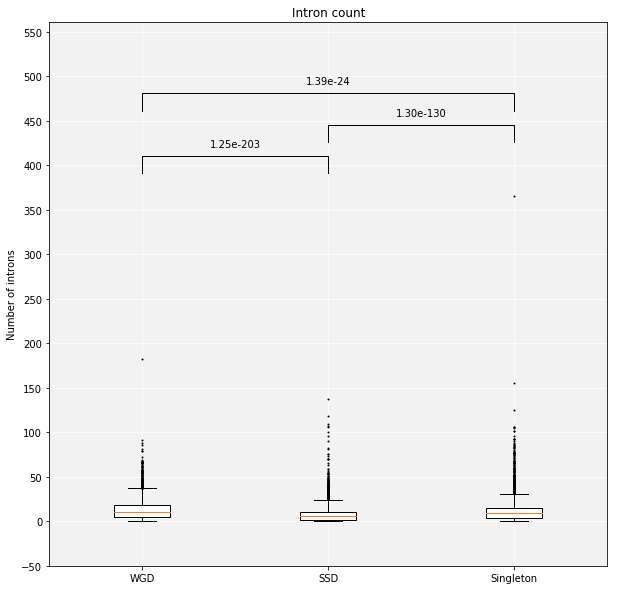

Effect size: 0.28989545149173984


In [173]:
cursor.execute('''SELECT intron_count FROM gene_features WHERE intron_count != -1 AND dup_type == "WGD"''')
w_i = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT intron_count FROM gene_features WHERE intron_count != -1 AND dup_type == "SSD"''')
s_i = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT intron_count FROM gene_features WHERE intron_count != -1 AND dup_type == "singleton"''')
si_i = [x[0] for x in cursor.fetchall()]
box_plot_pvals(w_i, s_i, si_i, 'Intron count', 'Number of introns', 14, 'intron_count__final', stars=False, large_scale='Extra')

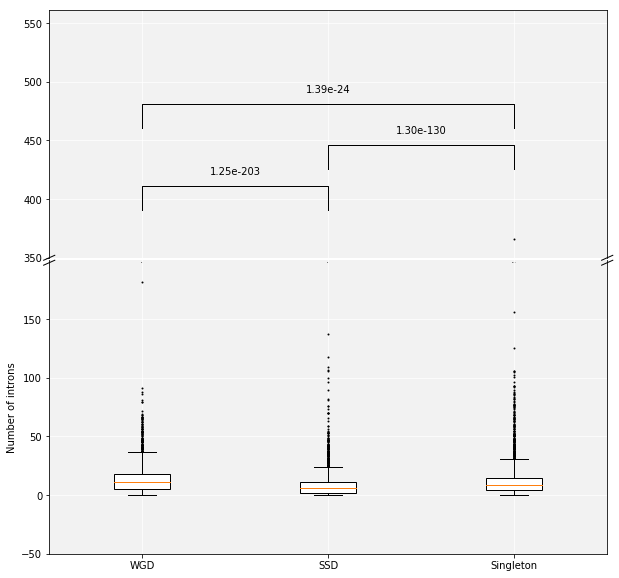

In [189]:
split_box(w_i, s_i, si_i, 'Intron Count', 'Number of introns', 14, 'intron_count_split', large_scale='Extra', cutoff=200, upper=350)

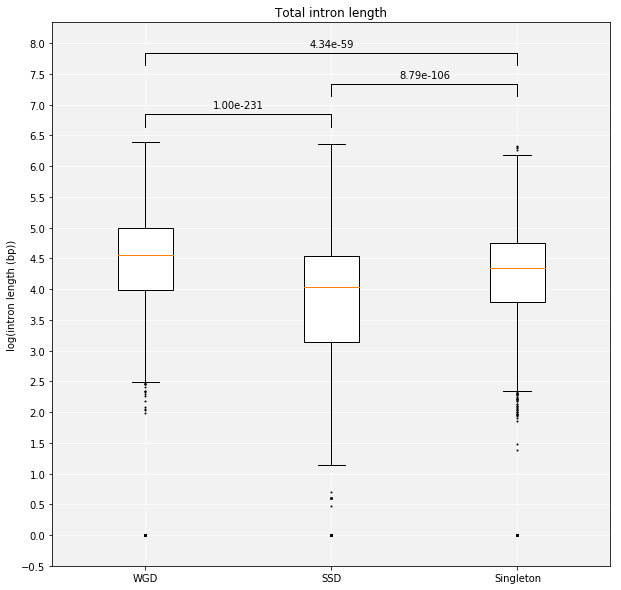

Effect size: 0.3095643344016995


In [23]:
from math import log10
cursor.execute('''SELECT intron_length FROM gene_features WHERE intron_length != -1 AND dup_type == "WGD"''')
w_l = [x[0] if x[0] == 0 else log10(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT intron_length FROM gene_features WHERE intron_length != -1 AND dup_type == "SSD"''')
s_l = [x[0] if x[0] == 0 else log10(x[0]) for x in cursor.fetchall()]
cursor.execute('''SELECT intron_length FROM gene_features WHERE intron_length != -1 AND dup_type == "singleton"''')
si_l = [x[0] if x[0] == 0 else log10(x[0]) for x in cursor.fetchall()]

box_plot_pvals(w_l, s_l, si_l, 'Total intron length', 'log(intron length (bp))', 14, 'intron_len_final', stars=False)

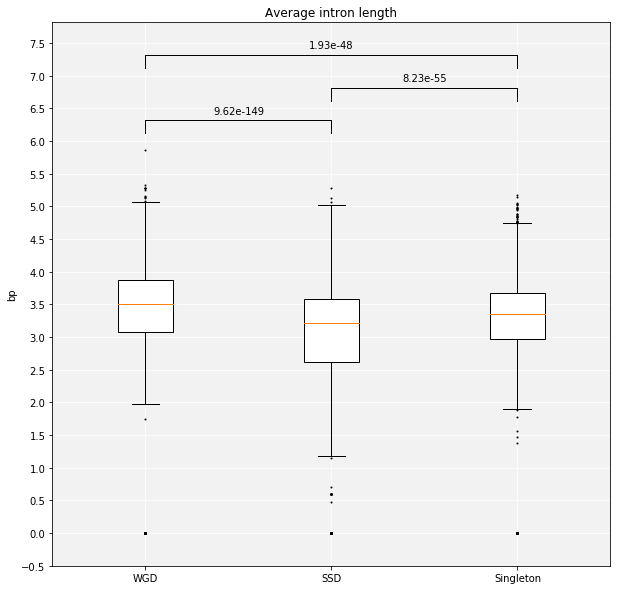

Effect size: 0.247766336835043


In [22]:
from math import log10
cursor.execute('''SELECT avg_intron FROM gene_features WHERE dup_type == "WGD"''')
w_a = [log10(x[0]) if x[0] != 0 else x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT avg_intron FROM gene_features WHERE dup_type == "SSD"''')
s_a = [log10(x[0]) if x[0] != 0 else x[0] for x in cursor.fetchall()]

cursor.execute('''SELECT avg_intron FROM gene_features WHERE dup_type == "singleton"''')
si_a = [log10(x[0]) if x[0] != 0 else x[0] for x in cursor.fetchall()]

box_plot_pvals(w_a, s_a, si_a, 'Average intron length', 'bp', 15, 'avg_intron_final', stars=False)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
bins_d = np.arange(0, 245709431, 10000)
WGD_dist, SSD_dist, sing_dist, mix_dist = [],[],[],[]
cursor.execute('''SELECT start, end FROM gene_features WHERE chrom= 1 AND dup_type="WGD"''')
for x in cursor.fetchall():
    for y in range(x[0], x[1]+1):
        WGD_dist.append(y)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

cursor.execute('''SELECT start, end FROM gene_features WHERE chrom= 1 AND dup_type="SSD"''')
for x in cursor.fetchall():
    for y in range(x[0], x[1]+1):
        SSD_dist.append(y)

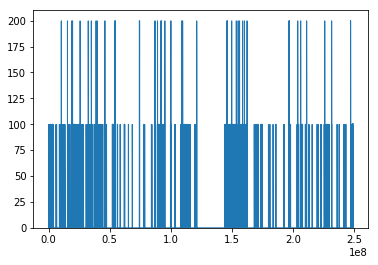

In [26]:
bins_d = np.arange(0, max(SSD_dist), 100)
fig, ax = plt.subplots()
ax.hist(SSD_dist, bins=bins_d, histtype='step')
plt.show()

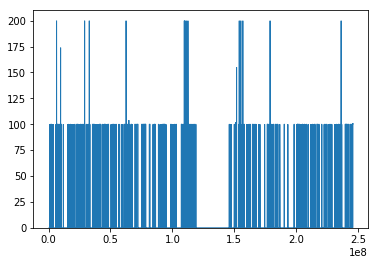

In [30]:
import numpy as np
bins_d = np.arange(0, max(WGD_dist), 100)
fig, ax = plt.subplots()
ax.hist(WGD_dist, bins=bins_d, histtype='step')
plt.show()

In [ ]:
bins_d = np.arange(0, max(sing_dist), 100)
fig, ax = plt.subplots()

# ax.hist(SSD_dist, fc = (0,0,1,0.3), bins=bins_d)
# ax.hist(sing_dist, fc = (0,1,0,0.3), bins=bins_d)
# plt.show()
print('dfe')

In [187]:
cursor.execute('''SELECT start, end FROM gene_features WHERE dup_type = "SSD" AND chrom = 1''')
ssd_locs, ssd_count = [], []
[ssd_locs.append((x[0], x[1])) for x in cursor.fetchall()] # ssd_locs is a list of tuples (start, end)
x1 = np.arange(0,max([x[1] for x in ssd_locs]), 500000) # makes a list from 0 to the highest end value
for i in range(0,len(x1)-1):
    gCount = 0
    for t in ssd_locs:
        if (t[0] in range(x1[i], x1[i+1]+1)) or (t[1] in range(x1[i], x1[i+1]+1)):
            gCount += 1
    ssd_count.append(gCount)
print(len(x1), len(ssd_count))

498 497


In [20]:
import time
count = 0
c_list = [x for x in range(1,23)]
c_list.append('X')
c_list.append('Y')
fig, axes = plt.subplots(12,2)
for num, ax in zip(c_list, fig.axes):
    ts = time.time()
    count += 1
    cursor.execute('''SELECT start, end FROM gene_features WHERE dup_type = "SSD" AND chrom = ?''', (str(num),))
    ssd_locs, ssd_count = [], []
    [ssd_locs.append((x[0], x[1])) for x in cursor.fetchall()] # ssd_locs is a list of tuples (start, end)
    x1 = np.arange(0,max([x[1] for x in ssd_locs]), max([x[1] for x in ssd_locs])/500) # makes a list from 0 to the highest end value
    for i in range(0,len(x1)-1):
        gCount = 0
        for t in ssd_locs:
            if (t[0] in range(int(x1[i]), int(x1[i+1]+1))) or (t[1] in range(int(x1[i]), int(x1[i+1]+1))):
                gCount += 1
        ssd_count.append(gCount)
    cursor.execute('''SELECT start, end FROM gene_features WHERE dup_type = "singleton" AND chrom = ?''', (str(num),))
    sing_locs, sing_count = [], []
    [sing_locs.append((x[0], x[1])) for x in cursor.fetchall()]
    # x2 = np.arange(0,max([x[1] for x in sing_locs]), 1000000)
    for i in range(0,len(x1)-1):
        gCount = 0
        for t in sing_locs:
            if (t[0] in range(int(x1[i]), int(x1[i+1]+1))) or (t[1] in range(int(x1[i]), int(x1[i+1]+1))):
                gCount += 1
        sing_count.append(gCount)
    cursor.execute('''SELECT start, end FROM gene_features WHERE dup_type = "WGD" AND chrom = ?''', (str(num),))
    WGD_locs, WGD_count = [], []
    [WGD_locs.append((x[0], x[1])) for x in cursor.fetchall()]
    for i in range(0,len(x1)-1):
        gCount = 0
        for t in WGD_locs:
            if (t[0] in range(int(x1[i]), int(x1[i+1]+1))) or (t[1] in range(int(x1[i]), int(x1[i+1]+1))):
                gCount += 1
        WGD_count.append(gCount)
    cursor.execute('''SELECT start, end FROM gene_features WHERE chrom = ?''', (str(num),))
    all_locs, all_count = [], []
    [all_locs.append((x[0], x[1])) for x in cursor.fetchall()]
    for i in range(0,len(x1)-1):
        gCount = 0
        for t in all_locs:
            if (t[0] in range(int(x1[i]), int(x1[i+1]+1))) or (t[1] in range(int(x1[i]), int(x1[i+1]+1))):
                gCount += 1
        all_count.append(gCount)
    if len(x1) != len(ssd_count):
        x1 = x1[0:-1]
    ax.set_ylim(bottom=0)
    ax.set_yticks(np.linspace(0,max(all_count), num=5))
    ax.set_xlim(left=0, right=max([x[1] for x in ssd_locs]))
    ax.set_xticks(np.linspace(0,int(ax.get_xlim()[1]), num=10))
    ax.set_yticklabels(ax.get_ymajorticklabels(), size=1)
    ax.set_xticklabels(labels=np.linspace(0, int(ax.get_xlim()[1]), num=10), size=1) #have to specify the tick labels 
    
    ax.fill_between(x1, ssd_count, alpha= 0.3, color= '#FF0000', label='SSD')
    ax.fill_between(x1, sing_count, alpha= 0.3, label='Singleton')
    ax.fill_between(x1, WGD_count, alpha=0.3, label='WGD', color= '#66FF66')
    ax.plot(x1, all_count, linestyle='dotted', linewidth= 0.35, color= (0,0,0,0.2), label= 'Overall gene content')
    
    print('Chromosome ' + str(count) + ' done. It took: ', time.time()-ts, ' seconds')

# plt.legend()
plt.savefig('gene_plot_all.svg')
plt.close('all')


Chromosome 1 done. It took:  8.992242097854614  seconds
Chromosome 2 done. It took:  5.798310995101929  seconds
Chromosome 3 done. It took:  4.705487012863159  seconds
Chromosome 4 done. It took:  3.3377509117126465  seconds
Chromosome 5 done. It took:  3.902095079421997  seconds
Chromosome 6 done. It took:  4.60727596282959  seconds
Chromosome 7 done. It took:  4.472825050354004  seconds
Chromosome 8 done. It took:  3.0159080028533936  seconds
Chromosome 9 done. It took:  3.5326988697052  seconds
Chromosome 10 done. It took:  3.280626058578491  seconds
Chromosome 11 done. It took:  6.165266990661621  seconds
Chromosome 12 done. It took:  4.49796199798584  seconds
Chromosome 13 done. It took:  1.4432311058044434  seconds
Chromosome 14 done. It took:  3.8479349613189697  seconds
Chromosome 15 done. It took:  2.8255460262298584  seconds
Chromosome 16 done. It took:  3.8899409770965576  seconds
Chromosome 17 done. It took:  5.271233081817627  seconds
Chromosome 18 done. It took:  1.273278

In [206]:
if len(x1) != len(ssd_count):
    x1 = x1[0:-1]
fig, ax = plt.subplots()
ax.fill_between(x1, ssd_count, alpha= 0.3, color= '#FF0000', label='SSD')
ax.fill_between(x1, sing_count, alpha= 0.3, label='Singleton')
ax.fill_between(x1, WGD_count, alpha=0.3, label='WGD', color= '#66FF66')
ax.plot(x1, all_count, linestyle='dotted', linewidth= 0.35, color= (0,0,0,0.2), label= 'Overall gene content')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.grid(linewidth = 0.05)
plt.legend()
plt.savefig('test_fig.svg')
plt.close('all')

In [28]:
cursor.execute('''SELECT start, end FROM gene_features WHERE chrom= 1 AND dup_type="singleton"''')
for x in cursor.fetchall():
    for y in range(x[0], x[1]+1):
        sing_dist.append(y)

In [ ]:
testDB = sqlite3.connect('./database')
c = testDB.cursor()
c.execute('''''')

In [30]:
cursor.close()
db.close()

In [29]:
db.commit()

In [21]:
cursor.close()
db.close()

In [55]:
cursor.close()
db.close()

In [28]:
len(ids)

20277

In [29]:
def split_box(wList, sList, siList, title, label, correction, filename, large_scale = False,cutoff=None, upper=None):
    from matplotlib import gridspec
    box_list = []
    box_list.append(wList)
    box_list.append(sList)
    box_list.append(siList)
    
    m = max([max(wList), max(sList), max(siList)])
    mi = min([min(wList), min(sList), min(siList)])
    
    
    if cutoff and large_scale == False:
        
        ann_start = m + 2.5
        
        #create two subplots, assign height ratio based on how much is fitting into each, so scale is the same
        #hspace adjusts spacing between plots
        fig = plt.figure(figsize=(10, 10)) 
        gs = gridspec.GridSpec(2, 1, height_ratios=[(ann_start+17)-upper,cutoff-mi], hspace=0.01)
        ax_out = plt.subplot(gs[0])
        ax = plt.subplot(gs[1])
        
        flierprops = dict(markersize=1)
        #plot the whole thing on both subplots
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        for patch in boxes['boxes']:
            patch.set_facecolor('white')
            
        boxes2 = ax_out.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        for patch in boxes2['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        ax.spines['top'].set_visible(False)
        
        ax_out.set_facecolor((0,0,0,0.05))
        ax_out.grid(color = 'white')
        ax_out.spines['bottom'].set_visible(False)
        ax_out.xaxis.set_tick_params(size=0, labelsize=0)
        
        #set ylim for each so that only the relevant part is visible
        ax.set_ylim(mi-5, cutoff+5)
        ax_out.set_ylim(upper, ann_start+17)
        
        #put the diagonal lines on the bottom of the top subplot
        d = .01 
        #.transAxes transforms axes coordinates (which go from 0 -> 1) into display coordinates
        kwargs = dict(transform=ax_out.transAxes, color='k', clip_on=False, lw=1)
        ax_out.plot((-d, d), (-d, d), **kwargs) # top-left diagonal (x1, x2), (y1,y2)
        ax_out.plot((1-d, 1 + d), (-d, d), **kwargs)

        #same x coordinates as the top line but 2d lower down
        ax_out.plot((-d,d), (-3*d,-d), **kwargs)
        ax_out.plot((1-d, 1+d), (-3*d, -d), **kwargs)
        
        ax.set_yticks(np.arange(mi-5,cutoff+5,5))
        ax_out.set_yticks(np.arange(upper,ann_start+17,5))

        ax_out.plot([1,1,2,2], [ann_start,ann_start+2,ann_start+2,ann_start], color = (0,0,0,1), linewidth= 1)
        ax_out.annotate(get_pval(wList,sList, correction), xy = (1.5, ann_start+3), size = 10, ha= 'center')

        ax_out.plot([2,2,3,3], [ann_start+3.5,ann_start+5.5,ann_start+5.5,ann_start+3.5], color = (0,0,0,1), linewidth= 1)
        ax_out.annotate(get_pval(sList,siList,correction), xy = (2.5, ann_start+6.5), size = 10, ha= 'center')

        ax_out.plot([1,1,3,3], [ann_start+7, ann_start+9 ,ann_start+9, ann_start+7], color = (0,0,0,1), linewidth = 1)
        ax_out.annotate(get_pval(wList, siList,correction), xy = (2, ann_start+10), size = 10, ha = 'center')
        
        ax_out.set_title(title)
        plt.savefig(filename + '.png')
        plt.show()
        
    elif cutoff and large_scale == 'Extra':
        ann_start = m + 25
        
        fig = plt.figure(figsize=(10, 10)) 
        gs = gridspec.GridSpec(2, 1, height_ratios=[(ann_start+170)-upper,cutoff-(mi-50)], hspace=0.01)
        ax_out = plt.subplot(gs[0])
        ax = plt.subplot(gs[1])
        
        flierprops = dict(markersize=1)
        boxes = ax.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes['boxes']:
            patch.set_facecolor('white')
            
        boxes2 = ax_out.boxplot(box_list, labels=['WGD', 'SSD', 'Singleton'], patch_artist=True, flierprops=flierprops) 
        #can set the variable 'whis' in boxplot to 'range to have whiskers at min and max
        for patch in boxes2['boxes']:
            patch.set_facecolor('white')

        ax.set_facecolor((0,0,0,0.05))
        ax.grid(color = 'white')
        ax.set_ylabel(label)
        ax.spines['top'].set_visible(False)
        
        ax_out.set_facecolor((0,0,0,0.05))
        ax_out.grid(color = 'white')
        ax_out.spines['bottom'].set_visible(False)
        ax_out.xaxis.set_tick_params(size=0, labelsize=0)
        
        d = .01  # how big to make the diagonal lines in axes coordinates
        # arguments to pass to plot, just so we don't keep repeating them
        kwargs = dict(transform=ax_out.transAxes, color='k', clip_on=False, lw=1) #transform converts axes coordinates to display coordinates
        ax_out.plot((-d, d), (-d, d), **kwargs) # top-left diagonal (x1, x2), (y1,y2)
        ax_out.plot((1-d, 1 + d), (-d, d), **kwargs)

        ax_out.plot((-d,d), (-3*d,-d), **kwargs)
        ax_out.plot((1-d, 1+d), (-3*d, -d), **kwargs)
        
        ax.set_yticks(np.arange(mi-50,cutoff,50))
        ax_out.set_yticks(np.arange(upper, ann_start+170, 50))
        
        ax.set_ylim(mi-50,cutoff)
        ax_out.set_ylim(upper,ann_start+170)
        
        ax_out.plot([1,1,2,2], [ann_start,ann_start+20,ann_start+20,ann_start], color = (0,0,0,1), linewidth= 1)
        ax_out.annotate(get_pval(wList,sList, correction), xy = (1.5, ann_start+30), size = 10, ha= 'center')


        ax_out.plot([2,2,3,3], [ann_start+35,ann_start+55,ann_start+55,ann_start+35], color = (0,0,0,1), linewidth= 1)
        ax_out.annotate(get_pval(sList,siList,correction), xy = (2.5, ann_start+65), size = 10, ha= 'center') # *s go 0.25 higher


        ax_out.plot([1,1,3,3], [ann_start+70, ann_start+90 ,ann_start+90, ann_start+70], color = (0,0,0,1), linewidth = 1)
        ax_out.annotate(get_pval(wList, siList,correction), xy = (2, ann_start+100), size = 10, ha = 'center')
        
        ax_out.set_title(title)
        plt.savefig(filename + '.png')
        plt.show()

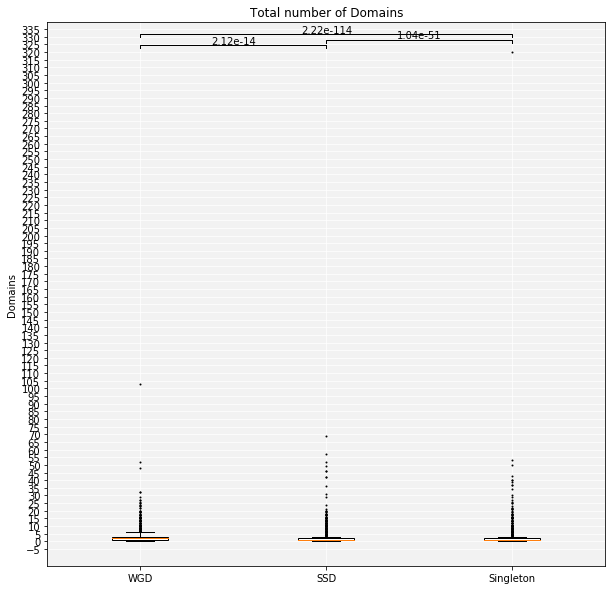

Effect size: 0.07055683261870598


In [21]:
cursor.execute('''SELECT domains FROM gene_features WHERE dup_type == "WGD"''')
w_dom = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT domains FROM gene_features WHERE dup_type == "SSD"''')
s_dom = [x[0] for x in cursor.fetchall()]
cursor.execute('''SELECT domains FROM gene_features WHERE dup_type == "singleton"''')
si_dom = [x[0] for x in cursor.fetchall()]

box_plot_pvals(w_dom, s_dom, si_dom, 'Total number of Domains', 'Domains', 14, 'total_domains', stars=False, large_scale=True)

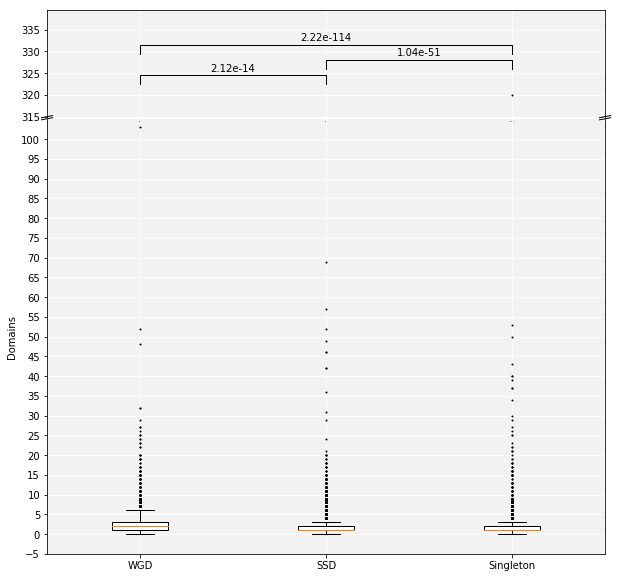

In [22]:
split_box(w_dom, s_dom, si_dom, 'Total number of Domains', 'Domains', 14, 'total_domains', cutoff=100, upper=315)

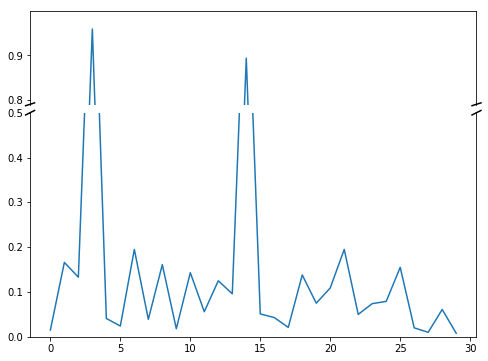

In [73]:
import matplotlib.pyplot as plt, numpy as np
fig = plt.figure(figsize=(8, 6)) 
m=1
g=0.79
c = 0.5
mi = 0

gs = gridspec.GridSpec(2, 1, height_ratios=[m-(g), c-mi])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))

pts[[3, 14]] += .8
ax1.plot(pts)
ax2.plot(pts)

ax2.set_ylim(0,0.5)
ax1.set_ylim(0.79, 1)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off') # don't put tick labels at the top
ax1.xaxis.set_tick_params(size=0)
ax2.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) #transform converts axes coordinates to display coordinates
ax1.plot((-d, d), (-d, d+0.01), **kwargs) # top-left diagonal (x1, x2), (y1,y2)
ax1.plot((1-d, 1 + d), (-d, d+0.01), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,d), (1-d,1+d), **kwargs)
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

gs.update(hspace=0.05)

plt.show()



In [24]:
tl = [1,2,3,4,5]
[x if x > 2 for x in tl]

SyntaxError: invalid syntax (<ipython-input-24-05c8c15ce05f>, line 2)

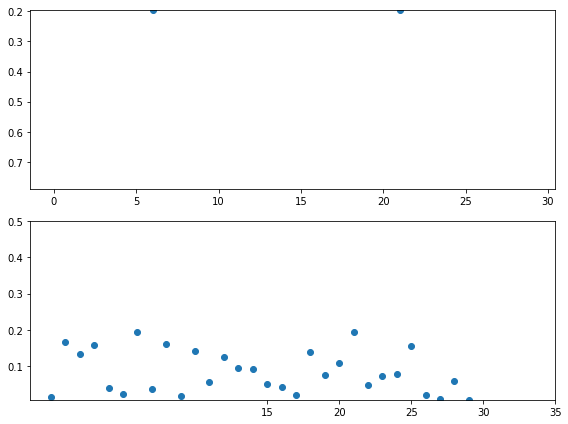

In [7]:
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt

pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])
mi = min(pts)
m = max(pts)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(pts, 'o')
ax1 = plt.subplot(gs[1])
ax1.plot(pts, 'o')

ax0.set_ylim(g,m)
ax1.set_ylim(mi,c)

ticks = [tick for tick in ax1.get_xticks() if tick > 10]
ax1.set_xticks(ticks)

plt.tight_layout()
plt.show()

In [159]:
from math import log10, sqrt
#get list of values for each feature, may need to make sure only taking genes with all of them present
col_dict = {}
col_list = ['gLength', 'cds_len', 'ess', 'dn_ds', 'unique_domains', 'gc_content', 
            'gc3', 'domains', 'avg_intron', 'motif_number', 'specificity', 'max_exp', 
            'trans_count', 'intron_count', 'intron_length']
for feature in col_list:
    if feature == 'dn_ds':
        query = 'SELECT ' + feature + ' FROM macaque_paralogs WHERE NOT dn_ds IS NULL'
    elif feature == 'max_exp':
        query = 'SELECT ' + feature + ' FROM gene_features WHERE NOT ' + feature + ' IS NULL AND max_exp >1'
    else:
        query = 'SELECT ' + feature + ' FROM gene_features WHERE NOT ' + feature + ' IS NULL'
    cursor.execute(query)
    col_dict[feature] = [x[0] for x in cursor.fetchall()]



In [160]:
#for each feature, check normality and log normality
for feature in col_list:
    norm = normaltest(col_dict[feature])
    try:
        lognorm = normaltest([log10(x) for x in col_dict[feature]])
    except ValueError:
        lognorm = 'Undefined'
    try:
        sqrt_norm = normaltest([sqrt(x) for x in col_dict[feature]])
    except ValueError:
        sqrt_norm = 'Undefined'
    print(feature)
    print('Normality: ', norm.pvalue)
    try:
        print('Log normal: ', lognorm.pvalue)
    except AttributeError:
        print('Log normal: ', lognorm)
    try:
        print('Root normal: ', sqrt_norm.pvalue)
    except AttributeError:
        print('Root normal: ', sqrt_norm)

gLength
Normality:  0.0
Log normal:  1.0050440682237006e-288
Root normal:  0.0
cds_len
Normality:  0.0
Log normal:  0.0
Root normal:  0.0
ess
Normality:  0.0
Log normal:  Undefined
Root normal:  Undefined
dn_ds
Normality:  0.0
Log normal:  Undefined
Root normal:  0.0
unique_domains
Normality:  0.0
Log normal:  Undefined
Root normal:  2.4335906789189694e-205
gc_content
Normality:  9.59519630889698e-245
Log normal:  0.0
Root normal:  1.1011878139919913e-267
gc3
Normality:  0.0
Log normal:  Undefined
Root normal:  8.339240203827811e-141
domains
Normality:  0.0
Log normal:  Undefined
Root normal:  0.0
avg_intron
Normality:  0.0
Log normal:  Undefined
Root normal:  0.0
motif_number
Normality:  0.0
Log normal:  Undefined
Root normal:  0.0
specificity
Normality:  0.0
Log normal:  4.165017648856688e-268
Root normal:  0.0
max_exp
Normality:  0.0
Log normal:  3.5206071643798265e-85
Root normal:  0.0
trans_count
Normality:  0.0
Log normal:  0.0
Root normal:  0.0
intron_count
Normality:  0.0
Log n

In [ ]:
import itertools
s = itertools.combinations(col_list, 2)
log_list = ['gLength', 'specificity', 'max_exp',]

for x,y in s:
    fig, ax = plt.subplots(figsize = (7,7))
    if x in log_list and (y not in log_list):
        try:
            r = [log10(f) for f in col_dict[x]]
            t = col_dict[y]
            ax.plot(r, t, 'o')
        except ValueError:
            if y == 'dn_ds':
                query = 'SELECT ' + x + ',' + y + ' FROM gene_features INNER JOIN macaque_paralogs ON gene_features.id == macaque_paralogs.id WHERE ((NOT ' + x + ' IS NULL) AND NOT ' + y + ' IS NULL) AND dn_ds < 10'
                cursor.execute(query)
                res = cursor.fetchall()
                r = [log10(i[0]) for i in res]
                t = [i[1] for i in res]
                ax.plot(r, t, 'o')
            else:
                try:
                    query = 'SELECT ' + x + ',' + y + ' FROM gene_features WHERE (NOT ' + x + ' IS NULL AND NOT ' + y + ' IS NULL)'
                    cursor.execute(query)
                    res = cursor.fetchall()
                    
                    r = [log10(i[0]) for i in res]
                    t = [i[1] for i in res]
                    
                    ax.plot(r, t, 'o')
                    
                except Exception:
                    print(x,y)
                    plt.close()
                    next
    elif y in log_list and (x not in log_list):
        try:
            r = col_dict[x]
            t = [log10(g) for g in col_dict[y]]
            ax.plot(r, t, 'o')
        except ValueError:
            if x == 'dn_ds':
                query = 'SELECT ' + x + ',' + y + ' FROM gene_features INNER JOIN macaque_paralogs ON gene_features.id == macaque_paralogs.id WHERE (NOT ' + x + ' IS NULL AND NOT ' + y + ' IS NULL) AND dn_ds < 10'
                cursor.execute(query)
                res = cursor.fetchall()
                
                r = [i[0] for i in res]
                t = [log10(i[1]) for i in res]
                
                ax.plot(r, t, 'o')
            else:
                try:
                    query = 'SELECT ' + x + ',' + y + ' FROM gene_features WHERE (NOT ' + x + ' IS NULL AND NOT ' + y + ' IS NULL)'
                    cursor.execute(query)
                    res = cursor.fetchall()
                    
                    r = [i[0] for i in res]
                    t = [log10(i[1]) for i in res]
                    
                    ax.plot(r, t, 'o')
                    
                except Exception:
                    print(x,y)
                    plt.close()
                    next
    elif (x in log_list) and (y in log_list):
        try:
            r = [log10(f) for f in col_dict[x]]
            t = [log10(g) for g in col_dict[y]]
            ax.plot(r, t, 'o')
        except ValueError:
            try:
                query = 'SELECT ' + x + ',' + y + ' FROM gene_features WHERE (NOT ' + x + ' IS NULL AND NOT ' + y + ' IS NULL)'
                cursor.execute(query)
                res = cursor.fetchall()
                r = [log10(i[0]) for i in res]
                t = [log10(i[1]) for i in res]
                ax.plot(r, t, 'o')
            except Exception:
                print(x,y)
                plt.close()
                next
    else:
        try:
            r = col_dict[x]
            t = col_dict[y]
            ax.plot(r, t, 'o')
        except ValueError:
            if x == 'dn_ds':
                query = 'SELECT ' + x + ',' + y + ' FROM gene_features INNER JOIN macaque_paralogs ON gene_features.id == macaque_paralogs.id WHERE (NOT ' + x + ' IS NULL AND (NOT ' + y + ' IS NULL)) AND dn_ds < 10'
                cursor.execute(query)
                res = cursor.fetchall()
                
                r = [i[0] for i in res]
                t = [i[1] for i in res]
                
                ax.plot(r, t, 'o')
                
            elif y == 'dn_ds':
                query = 'SELECT ' + x + ',' + y + ' FROM gene_features INNER JOIN macaque_paralogs ON gene_features.id == macaque_paralogs.id WHERE (NOT ' + x + ' IS NULL AND NOT ' + y + ' IS NULL) AND dn_ds < 10'
                cursor.execute(query)
                res = cursor.fetchall()
                
                r = [i[0] for i in res]
                t = [i[1] for i in res]
                
                ax.plot(r, t, 'o')
            else:
                try:
                    query = 'SELECT ' + x + ',' + y + ' FROM gene_features WHERE (NOT ' + x + ' IS NULL AND NOT ' + y + ' IS NULL)'
                    cursor.execute(query)
                    res = cursor.fetchall()
                    r = [i[0] for i in res]
                    t = [i[1] for i in res]
                    
                    ax.plot(r,t,'o')
                except Exception:
                    print(x,y)
                    plt.close()
                    next
    print(len(r), len(t))
    plt.xlabel(x)
    plt.ylabel(y)
    title = x + '_vs_' + y + '_log.png'
    plt.savefig(title)
    plt.show()

In [46]:
normaltest(tot_cds)

NormaltestResult(statistic=1507.8734257497372, pvalue=0.0)

In [47]:
normaltest(tot_len)

NormaltestResult(statistic=1326.2789507855132, pvalue=1.0050440682237006e-288)